In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.9 MB 33.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=4fca190232a7b6a01e4a1583849ce5b94f4914ed14fbed5041b52d6b55034837
  Stored in directory: /tmp/pip-ephem-wheel-cache-70raafth/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=35349883ac6a98fb7572e4968a5c93b27f97121ae0b6f1b66276a23b3ab207c0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score, RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  DRIRC89L0T   18  137576      209136          846              26   
1  TS0FIUNHNU   47   57194        5970          748              30   
2  I0YR284A1V   26   84328       95065          453               7   
3  WB1T7NQV8A   53   49795      229582          533             107   
4  J6GU9M4G1Z   49  115450       22072          840               0   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               2         10.47        60      0.81  High School   
1               2         19.72        36      0.73  High School   
2               2         24.25        12      0.45     Master's   
3               3         14.44        60      0.17   Bachelor's   
4               4         24.48        12      0.11   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0  Self-employed        Single         Yes            No    Business   
1     Unemployed      Divorced          No           Yes   Education   
2  Self-employed       Married          No            No       Other   
3  Self-employed        Single         Yes            No        Auto   
4      Part-time        Single          No           Yes   Education   

  HasCoSigner  Default  
0          No        0  
1          No        0  
2         Yes        0  
3         Yes        1  
4         Yes        0

In [5]:
df.drop('LoanID',axis=1,inplace=True)
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         10.47        60      0.81  High School  Self-employed        Single   
1         19.72        36      0.73  High School     Unemployed      Divorced   
2         24.25        12      0.45     Master's  Self-employed       Married   
3         14.44        60      0.17   Bachelor's  Self-employed        Single   
4         24.48        12      0.11   Bachelor's      Part-time        Single   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes            No    Business          No        0  
1          No           Yes   Education          No        0  
2          No            No       Other         Yes        0  
3         Yes            No        Auto         Yes        1  
4          No           Yes   Education         Yes        0

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         10.47        60      0.81  High School  Self-employed        Single   
1         19.72        36      0.73  High School     Unemployed      Divorced   
2         24.25        12      0.45     Master's  Self-employed       Married   
3         14.44        60      0.17   Bachelor's  Self-employed        Single   
4         24.48        12      0.11   Bachelor's      Part-time        Single   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes            No    Business          No        0  
1          No           Yes   Education          No        0  
2          No            No       Other         Yes        0  
3         Yes            No        Auto         Yes        1  
4          No           Yes   Education         Yes        0

In [8]:
education_mapping = {
    'PhD': 3,
    'Master\'s': 2,
    'Bachelor\'s': 1,
    'High School': 0
}

df['Education'] = df['Education'].map(education_mapping)

In [9]:
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio  Education EmploymentType MaritalStatus  \
0         10.47        60      0.81          0  Self-employed        Single   
1         19.72        36      0.73          0     Unemployed      Divorced   
2         24.25        12      0.45          2  Self-employed       Married   
3         14.44        60      0.17          1  Self-employed        Single   
4         24.48        12      0.11          1      Part-time        Single   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0         Yes            No    Business          No        0  
1          No           Yes   Education          No        0  
2          No            No       Other         Yes        0  
3         Yes            No        Auto         Yes        1  
4          No           Yes   Education         Yes        0

In [10]:
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the specified columns
for column in ['HasMortgage', 'HasDependents', 'HasCoSigner']:
  df[column] = df[column].map(mapping)

df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio  Education EmploymentType MaritalStatus  \
0         10.47        60      0.81          0  Self-employed        Single   
1         19.72        36      0.73          0     Unemployed      Divorced   
2         24.25        12      0.45          2  Self-employed       Married   
3         14.44        60      0.17          1  Self-employed        Single   
4         24.48        12      0.11          1      Part-time        Single   

   HasMortgage  HasDependents LoanPurpose  HasCoSigner  Default  
0            1              0    Business            0        0  
1            0              1   Education            0        0  
2            0              0       Other            1        0  
3            1              0        Auto            1        1  
4            0              1   Education            1        0

In [11]:
mapping = {'Single': 0, 'Married': 1, 'Divorced':2}
df['MaritalStatus'] = df['MaritalStatus'].map(mapping)
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio  Education EmploymentType  MaritalStatus  \
0         10.47        60      0.81          0  Self-employed              0   
1         19.72        36      0.73          0     Unemployed              2   
2         24.25        12      0.45          2  Self-employed              1   
3         14.44        60      0.17          1  Self-employed              0   
4         24.48        12      0.11          1      Part-time              0   

   HasMortgage  HasDependents LoanPurpose  HasCoSigner  Default  
0            1              0    Business            0        0  
1            0              1   Education            0        0  
2            0              0       Other            1        0  
3            1              0        Auto            1        1  
4            0              1   Education            1        0

In [12]:
mapping = {'Unemployed': 0, 'Self-employed': 1, 'Part-time': 2, 'Full-time': 3}
df['EmploymentType'] = df['EmploymentType'].map(mapping)
df.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         10.47        60      0.81          0               1              0   
1         19.72        36      0.73          0               0              2   
2         24.25        12      0.45          2               1              1   
3         14.44        60      0.17          1               1              0   
4         24.48        12      0.11          1               2              0   

   HasMortgage  HasDependents LoanPurpose  HasCoSigner  Default  
0            1              0    Business            0        0  
1            0              1   Education            0        0  
2            0              0       Other            1        0  
3            1              0        Auto            1        1  
4            0              1   Education            1        0

In [13]:
# Perform one-hot encoding on 'LoanPurpose'
#loan_purpose_encoded = pd.get_dummies(df['LoanPurpose'], prefix='LoanPurpose', dtype=np.int64)


# Concatenate the encoded columns with the original DataFrame
#df = pd.concat([df, loan_purpose_encoded], axis=1)

# Drop the original 'LoanPurpose' column
#df.drop('LoanPurpose', axis=1, inplace=True)

#df.head()

In [14]:
df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose        object
HasCoSigner         int64
Default             int64
dtype: object

In [15]:
df.drop('LoanPurpose',axis=1,inplace=True)

In [16]:
df.corr()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000  0.000029   -0.001023     0.000265       -0.002529   
Income          0.000029  1.000000   -0.000661    -0.002797        0.001690   
LoanAmount     -0.001023 -0.000661    1.000000     0.001075        0.002110   
CreditScore     0.000265 -0.002797    0.001075     1.000000        0.000182   
MonthsEmployed -0.002529  0.001690    0.002110     0.000182        1.000000   
NumCreditLines -0.002301 -0.003552    0.000293     0.000795        0.002687   
InterestRate   -0.001661 -0.004746   -0.003809    -0.000579       -0.001697   
LoanTerm        0.000873 -0.002284    0.002243     0.000103       -0.000778   
DTIRatio       -0.004562 -0.000954    0.001639    -0.001905        0.001435   
Education      -0.001579  0.002941    0.002322    -0.001177       -0.000789   
EmploymentType -0.000021  0.003611   -0.003463    -0.003706        0.000311   
MaritalStatus   0.001440 -0.001831   -0.000453     0.004145        0.000737   
HasMortgage    -0.001404  0.000042   -0.002084     0.001335       -0.000588   
HasDependents   0.000337 -0.001258   -0.000467    -0.002513        0.000468   
HasCoSigner    -0.001573 -0.003847   -0.001855    -0.002088        0.001181   
Default        -0.167484 -0.100515    0.085519    -0.034128       -0.095429   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
Age                  -0.002301     -0.001661  0.000873 -0.004562  -0.001579   
Income               -0.003552     -0.004746 -0.002284 -0.000954   0.002941   
LoanAmount            0.000293     -0.003809  0.002243  0.001639   0.002322   
CreditScore           0.000795     -0.000579  0.000103 -0.001905  -0.001177   
MonthsEmployed        0.002687     -0.001697 -0.000778  0.001435  -0.000789   
NumCreditLines        1.000000      0.000374  0.000160 -0.000432   0.001273   
InterestRate          0.000374      1.000000  0.000215  0.000718   0.004056   
LoanTerm              0.000160      0.000215  1.000000  0.001630  -0.001661   
DTIRatio             -0.000432      0.000718  0.001630  1.000000   0.001252   
Education             0.001273      0.004056 -0.001661  0.001252   1.000000   
EmploymentType       -0.001407     -0.000471 -0.000568 -0.001047  -0.002543   
MaritalStatus         0.000057      0.005682  0.001244 -0.004768   0.001146   
HasMortgage           0.000703      0.000833  0.002732 -0.001491   0.002486   
HasDependents        -0.002019     -0.001279  0.000617  0.001033  -0.000023   
HasCoSigner           0.000637     -0.003725 -0.000250  0.001481   0.001931   
Default               0.028565      0.129885  0.000815  0.018595  -0.026434   

                EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
Age                  -0.000021       0.001440    -0.001404       0.000337   
Income                0.003611      -0.001831     0.000042      -0.001258   
LoanAmount           -0.003463      -0.000453    -0.002084      -0.000467   
CreditScore          -0.003706       0.004145     0.001335      -0.002513   
MonthsEmployed        0.000311       0.000737    -0.000588       0.000468   
NumCreditLines       -0.001407       0.000057     0.000703      -0.002019   
InterestRate         -0.000471       0.005682     0.000833      -0.001279   
LoanTerm             -0.000568       0.001244     0.002732       0.000617   
DTIRatio             -0.001047      -0.004768    -0.001491       0.001033   
Education            -0.002543       0.001146     0.002486      -0.000023   
EmploymentType        1.000000       0.003511    -0.003263      -0.001812   
MaritalStatus         0.003511       1.000000     0.000516       0.000863   
HasMortgage          -0.003263       0.000516     1.000000       0.000054   
HasDependents        -0.001812       0.000863     0.000054       1.000000   
HasCoSigner          -0.000822       0.000035    -0.002785       0.002237   
Default              -0.042670       0.008441    -0.021174      -0.034737   

                HasCoSi

Text(0.5, 1.0, 'Correlation of Features')

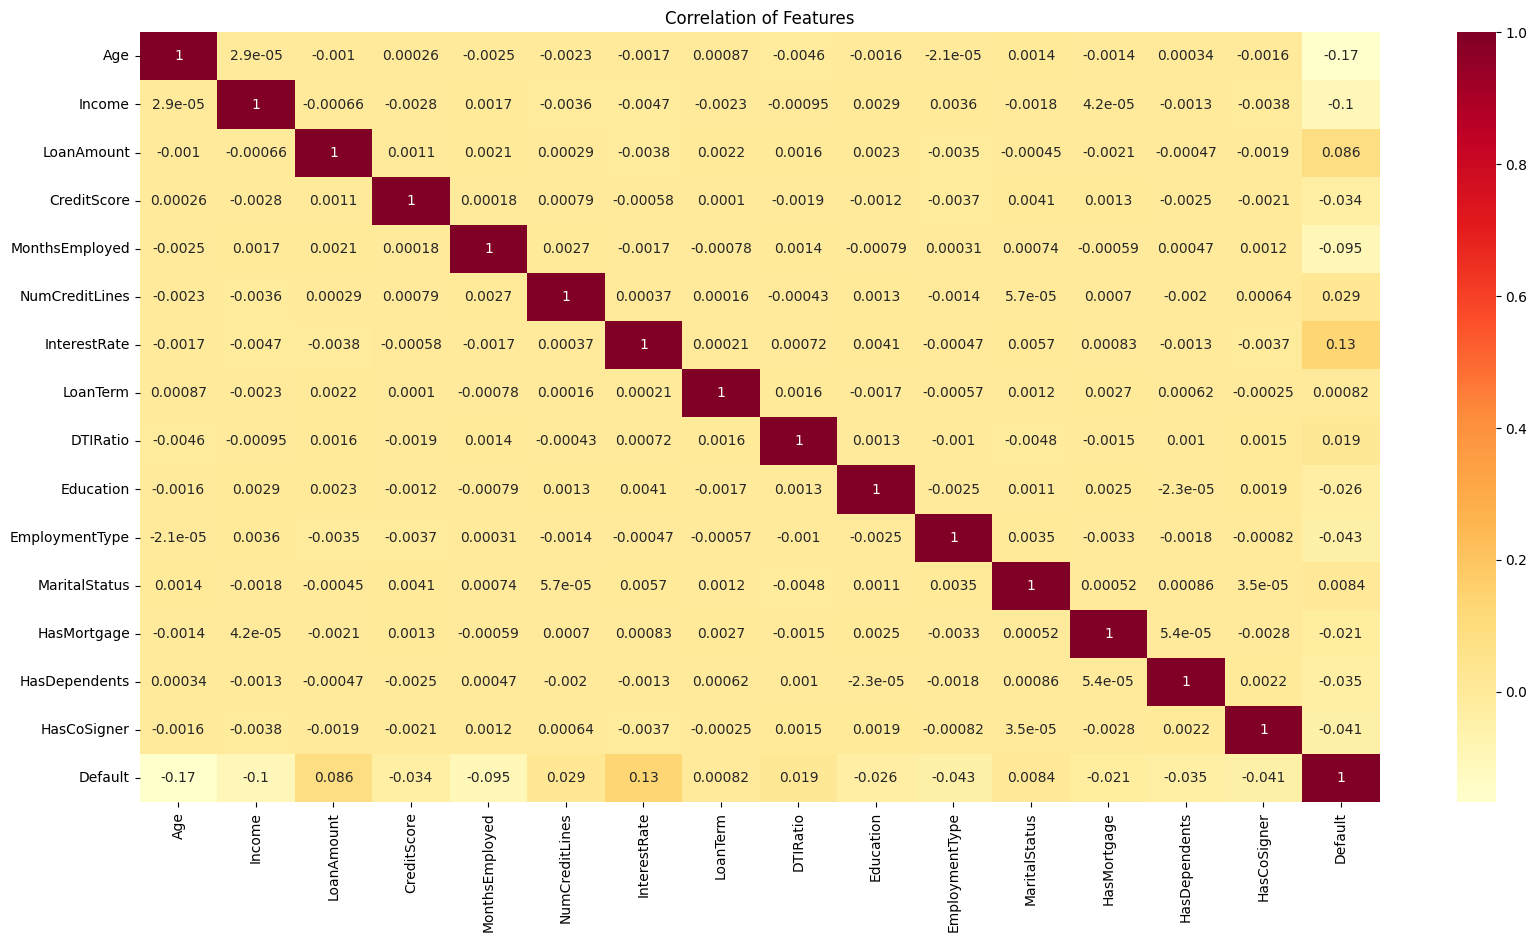

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("Correlation of Features")

In [18]:
#df.drop('LoanPurpose',axis=1,inplace=True)
df.drop('HasMortgage',axis=1,inplace=True)
df.drop('DTIRatio',axis=1,inplace=True)
df.drop('MaritalStatus',axis=1,inplace=True)
df.drop('LoanTerm',axis=1,inplace=True)

In [19]:
df.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
Education         0
EmploymentType    0
HasDependents     0
HasCoSigner       0
Default           0
dtype: int64

In [20]:
y=df['Default']
x=df.drop('Default',axis=1)

In [21]:
x.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   18  137576      209136          846              26               2   
1   47   57194        5970          748              30               2   
2   26   84328       95065          453               7               2   
3   53   49795      229582          533             107               3   
4   49  115450       22072          840               0               4   

   InterestRate  Education  EmploymentType  HasDependents  HasCoSigner  
0         10.47          0               1              0            0  
1         19.72          0               0              1            0  
2         24.25          2               1              0            1  
3         14.44          1               1              0            1  
4         24.48          1               2              1            1

In [22]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Default, dtype: int64

In [23]:
#cc = ClusterCentroids(random_state=42)
#x_sm,y_sm= cc.fit_resample(x,y)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [25]:
def scale_dataset(x,y,scaler=None):
  if scaler is None:
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
  else:
    x=scaler.transform(x)
  return x,y,scaler

In [26]:
x_train,y_train,scaler = scale_dataset(x_train,y_train)  #scaling the dataset as the magnitude of different features is different
x_test,y_test,scaler = scale_dataset(x_test,y_test,scaler)

from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13]
}

gsc_knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(gsc_knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_knn = grid_search.best_estimator_
y_pred = best_model_knn.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score

nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gsc_nb_model = GaussianNB()

grid_search = GridSearchCV(gsc_nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_nb = grid_search.best_estimator_
y_pred = best_model_nb.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.tree import DecisionTreeClassifier

dec_tree_model = DecisionTreeClassifier(random_state=42)
dec_tree_model.fit(x_train, y_train)
y_pred = dec_tree_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

from sklearn.model_selection import GridSearchCV

param_grid = {
    'splitter': ['random', 'best'],
    'max_depth': [None, 1, 3, 5, 7, 9, 11, 13],
}

gsc_dec_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(gsc_dec_tree_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

param_grid = {
    'n_estimators': [50,100,160,200,300],
    'max_depth': [3, 5, 7, 9, 11, 13, 17],
}

gsc_rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search = GridSearchCV(gsc_rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_rf = grid_search.best_estimator_
y_pred = best_model_rf.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from xgboost import XGBClassifier

xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(x_train, y_train)
y_pred = xgboost_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

param_grid = {
    'n_estimators': [50,100, 200, 300, 500, 1000],
    'eta': [0.1, 0.3, 0.5, 0.8],
    'max_depth': [3,5, 9, 11,None]
}

gsc_xgboost_model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(gsc_xgboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_xg = grid_search.best_estimator_
y_pred = best_model_xg.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(x_train, y_train)
y_pred = adaboost_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1]
}

gsc_adaboost_model = AdaBoostClassifier(random_state=42)

grid_search = GridSearchCV(gsc_adaboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_ab = grid_search.best_estimator_
y_pred = best_model_ab.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred))

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000, 1100],
    'subsample': [0.3, 0.5, 0.8, 1]
}

gsc_gb_model = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gsc_gb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_gb = grid_search.best_estimator_
y_pred = best_model_gb.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(x_train, y_train)
y_pred = log_reg_model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

gsc_log_reg_model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(gsc_log_reg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_model_lr = grid_search.best_estimator_
y_pred = best_model_lr.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ",accuracy_score(y_test,y_pred))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

# Fit the linear regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y_train)

# Predict using the polynomial regression model
x_test_poly = poly.transform(x_test)
y_pred_poly = poly_reg_model.predict(x_test_poly)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred_poly.round()))

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='poly')
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8837135304484042


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['poly']
}

best_svm_model = SVC(random_state=42)

grid_search = GridSearchCV(best_svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(x_test)
print(grid_search.best_params_)
print("Accuracy: ", accuracy_score(y_test, y_pred))

{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy:  0.8837135304484042


In [27]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [28]:
x_train.shape

(163421, 11)

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
from sklearn.metrics import r2_score, accuracy_score

def build_model(hp):
  nn_model= Sequential()
  nn_model.add(Dense(11,activation='relu',input_shape=(11,)))

  for i in range(hp.Int('num_of_layers', min_value=1, max_value=3)):
      nn_model.add(Dense(hp.Int('num_nodes' + str(i), min_value=2, max_value=11, step=2),
                         activation='relu'))
      #nn_model.add(Dropout(0.5))

  nn_model.add(Dense(1, activation='sigmoid'))

  nn_model.compile(optimizer=hp.Choice('optimizer', values=['SGD','RMSprop','Adam']),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  return nn_model

In [ ]:
tuner=kt.GridSearch(build_model, objective= 'val_accuracy',directory="mydir",project_name="dib2")
tuner.search(x_train,y_train,epochs=5, validation_split=0.2)
tuner.get_best_hyperparameters()[0].values

Trial 318 Complete [00h 00m 50s]
val_accuracy: 0.8841058611869812

Best val_accuracy So Far: 0.886951208114624
Total elapsed time: 04h 52m 34s

Search: Running Trial #319

Value             |Best Value So Far |Hyperparameter
3                 |3                 |num_of_layers
8                 |4                 |num_nodes0
SGD               |Adam              |optimizer
2                 |6                 |num_nodes1
8                 |4                 |num_nodes2

Epoch 1/5
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8819 - loss: 0.4030 - val_accuracy: 0.8841 - val_loss: 0.3405
Epoch 2/5
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8843 - loss: 0.3351 - val_accuracy: 0.8855 - val_loss: 0.3246
Epoch 3/5
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8844 - loss: 0.3245 - val_accuracy: 0.8855 - val_loss: 0.3207
Epoch 4/5
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8852 - loss: 0.3194 - val_accuracy: 0.8855 - val_loss: 0.3194
Epoch 5/5

In [ ]:
model=tuner.get_best_models(num_models=1)[0]
hist=model.fit(x_train,y_train,epochs=55,initial_epoch=5,validation_split=0.2,verbose=0)
y_pred=model.predict(x_test)
loss,accuracy=model.evaluate(x_test,y_test)
print("Accuracy: ",accuracy)

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  CKV34LU7V7   55  112656       92393          581             113   
1  62KTYNH93J   56   91569      131575          641              54   
2  JGFUSOIUH7   26   78169       75417          569             105   
3  4538THBHOX   26   63033       10804          326             118   
4  DXLNA06JHR   24   29665       21182          662             102   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               2         23.54        36      0.15          PhD   
1               1         15.19        12      0.43  High School   
2               3         18.02        12      0.29     Master's   
3               1         14.71        24      0.41  High School   
4               3         15.02        60      0.69          PhD   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0  Self-employed        Single         Yes           Yes        Home   
1      Part-time      Divorced         Yes           Yes   Education   
2      Part-time       Married         Yes           Yes   Education   
3      Part-time        Single          No            No    Business   
4     Unemployed        Single          No           Yes    Business   

  HasCoSigner  
0          No  
1         Yes  
2         Yes  
3         Yes  
4         Yes

In [ ]:
loanid = df_test['LoanID']

In [ ]:
df_test.drop('LoanID',axis=1,inplace=True)
df_test.drop('HasMortgage',axis=1,inplace=True)
df_test.drop('DTIRatio',axis=1,inplace=True)
df_test.drop('LoanPurpose',axis=1,inplace=True)
df_test.drop('LoanTerm',axis=1,inplace=True)

In [ ]:
df_test.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   55  112656       92393          581             113               2   
1   56   91569      131575          641              54               1   
2   26   78169       75417          569             105               3   
3   26   63033       10804          326             118               1   
4   24   29665       21182          662             102               3   

   InterestRate    Education EmploymentType MaritalStatus HasDependents  \
0         23.54          PhD  Self-employed        Single           Yes   
1         15.19  High School      Part-time      Divorced           Yes   
2         18.02     Master's      Part-time       Married           Yes   
3         14.71  High School      Part-time        Single            No   
4         15.02          PhD     Unemployed        Single           Yes   

  HasCoSigner  
0          No  
1         Yes  
2         Yes  
3         Yes  
4         Yes

In [ ]:
education_mapping = {
    'PhD': 3,
    'Master\'s': 2,
    'Bachelor\'s': 1,
    'High School': 0
}

df_test['Education'] = df_test['Education'].map(education_mapping)

In [ ]:
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the specified columns
for column in ['HasDependents','HasCoSigner']:
  df_test[column] = df_test[column].map(mapping)

df_test.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   55  112656       92393          581             113               2   
1   56   91569      131575          641              54               1   
2   26   78169       75417          569             105               3   
3   26   63033       10804          326             118               1   
4   24   29665       21182          662             102               3   

   InterestRate  Education EmploymentType MaritalStatus  HasDependents  \
0         23.54          3  Self-employed        Single              1   
1         15.19          0      Part-time      Divorced              1   
2         18.02          2      Part-time       Married              1   
3         14.71          0      Part-time        Single              0   
4         15.02          3     Unemployed        Single              1   

   HasCoSigner  
0            0  
1            1  
2            1  
3            1  
4            1

In [ ]:
mapping = {'Single': 0, 'Married': 1, 'Divorced':2}
df_test['MaritalStatus'] = df_test['MaritalStatus'].map(mapping)
df_test.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   55  112656       92393          581             113               2   
1   56   91569      131575          641              54               1   
2   26   78169       75417          569             105               3   
3   26   63033       10804          326             118               1   
4   24   29665       21182          662             102               3   

   InterestRate  Education EmploymentType  MaritalStatus  HasDependents  \
0         23.54          3  Self-employed              0              1   
1         15.19          0      Part-time              2              1   
2         18.02          2      Part-time              1              1   
3         14.71          0      Part-time              0              0   
4         15.02          3     Unemployed              0              1   

   HasCoSigner  
0            0  
1            1  
2            1  
3            1  
4            1

In [ ]:
mapping = {'Unemployed': 0, 'Self-employed': 1, 'Part-time': 2, 'Full-time': 3}
df_test['EmploymentType'] = df_test['EmploymentType'].map(mapping)
df_test.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   55  112656       92393          581             113               2   
1   56   91569      131575          641              54               1   
2   26   78169       75417          569             105               3   
3   26   63033       10804          326             118               1   
4   24   29665       21182          662             102               3   

   InterestRate  Education  EmploymentType  MaritalStatus  HasDependents  \
0         23.54          3               1              0              1   
1         15.19          0               2              2              1   
2         18.02          2               2              1              1   
3         14.71          0               2              0              0   
4         15.02          3               0              0              1   

   HasCoSigner  
0            0  
1            1  
2            1  
3            1  
4            1

In [ ]:
#loan_purpose_encoded = pd.get_dummies(df_test['LoanPurpose'], prefix='LoanPurpose', dtype=np.int64)


# Concatenate the encoded columns with the original DataFrame
#df_test = pd.concat([df_test, loan_purpose_encoded], axis=1)

# Drop the original 'LoanPurpose' column
#df_test.drop('LoanPurpose', axis=1, inplace=True)

#df_test.head()

In [ ]:
df_test.drop('MaritalStatus',axis=1,inplace=True)

In [ ]:
df_test=scaler.transform(df_test)

label_knn = best_model_knn.predict(df_test)

label_nb = best_model_nb.predict(df_test)

label_dt = best_model_dt.predict(df_test)

label_rf = best_model_rf.predict(df_test)

label_xg = best_model_xg.predict(df_test)

label_ab = best_model_ab.predict(df_test)

label = best_model_gb.predict(df_test)

label_log = best_model_lr.predict(df_test)

df_test = poly.transform(df_test)
label_poly = poly_reg_model.predict(df_test)

df_ans = pd.DataFrame({'LoanID': loanid, 'Default': label})

df_ans2 = pd.DataFrame({'LoanID': loanid, 'Default': label_log})

df_ans3 = pd.DataFrame({'LoanID': loanid, 'Default': label_poly}).round()
df_ans3['Default'] = df_ans3['Default'].astype(int)

df_ans4 = pd.DataFrame({'LoanID': loanid, 'Default': label_knn})

df_ans5 = pd.DataFrame({'LoanID': loanid, 'Default': label_nb})

df_ans6 = pd.DataFrame({'LoanID': loanid, 'Default': label_dt})

df_ans7 = pd.DataFrame({'LoanID': loanid, 'Default': label_rf})

df_ans8 = pd.DataFrame({'LoanID': loanid, 'Default': label_xg})

df_ans9 = pd.DataFrame({'LoanID': loanid, 'Default': label_ab})

df_ans.head()

df_ans.to_csv('submission.csv', index=False)

df_ans2.to_csv('submission_log.csv', index=False)

df_ans3.to_csv('submission_poly.csv', index=False)

df_ans4.to_csv('submission_knn.csv', index=False)

df_ans5.to_csv('submission_nb.csv', index=False)

df_ans6.to_csv('submission_dt.csv', index=False)

df_ans7.to_csv('submission_rf.csv', index=False)

df_ans8.to_csv('submission_xg.csv', index=False)

df_ans9.to_csv('submission_ab.csv', index=False)

In [ ]:
label_svm = best_svm_model.predict(df_test)
df_ans10 = pd.DataFrame({'LoanID': loanid, 'Default': label_svm})
df_ans10.to_csv('submission_svm.csv', index=False)

In [ ]:
label_nn = model.predict(df_test)
df_ans11 = pd.DataFrame({'LoanID': loanid, 'Default': label_nn.round()})
df_ans11.to_csv('submission_nn.csv', index=False)